# Prácticas 07-08  (5%, 5%) Entrega Lección Semana 13, 17:30 horas

# Predicción de la calidad del vino.

El ejercicio descrito a continuación será desarrollado a lo largo de varias prácticas. En este documento se enunciarán las actividades correspondientes a las prácticas 7 y 8.

## Propósito del ejercicio:

Aplicar técnicas de aprendizaje automático para predecir la calidad del vino en base a sus características químicas. Este es un problema de regresión, donde la variable objetivo (quality) es continua. Para lograrlo, se realizará un análisis exploratorio, se prepararán (preprocesarán) los datos para el entrenamiento, se entrenarán modelos para seleccionar el de mejor rendimiento, se afinará el modelo seleccionado y finalmente este se evaluará usando el conjunto de prueba.

## Propósito de las prácticas 7 y 8
Entrenar, seleccionar y probar modelos

## Actividades

1. Entrenamiento y selección de modelos: 
    1. Utilizar el pipeline de preprocesamiento desarrollado en las prácticas 5 y 6 dentro de otro pipeline para realizar los entrenamientos.
    1. Entrenar al menos tres modelos diferentes, puede utilizar algunos de los vistos en el curso o explorar nuevos. En el curso se ha utilizado: Linear Regression , Decision Trees, Random Forest, Stochastic Gradient Descent, Support Vector Machine. Entre otros adicionales están Logistic Regression, K-Nearest Neighbors y  Gaussian Naive Bayes.
    1. Seleccionar y utilizar una métrica adecuada para evaluar el rendimiento de cada modelo y compararlos entre si.
    1. Utilizar cross-validation para realizar los entrenamientos y evaluaciones.
    1. Seleccionar el modelo con el mejor rendimiento.
1. Afinamiento del modelo seleccionado: 
    1. Usar GridSearchCV o RandomizedSearchCV  para optimizar los hiperparámetros del modelo seleccionado y mejorar el rendimiento.
2. Evaluación final:
    1. Medir el rendimiento del modelo afinado utilizando el conjunto de prueba y determinar el intervalo de confianza del 95% para la métrica seleccionada.
    1. Obtener, si el modelo lo permite, un ranking de las características que tuvieron mayor influencia en las predicciones.
3. Análisis de resultados:
    1. Plantear sugerencias para una siguiente iteración.




In [1]:
## Ingrese su código a partir de esta celda

In [7]:
import sys
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [8]:
vinoRojo = pd.read_csv('winequality-red.csv', sep =';')
vinoBlanco = pd.read_csv('winequality-white.csv', sep =';')

In [9]:
vinoRojo.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
vinoBlanco.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
vinoRojo['tipo'] = 'tinto'
vinoBlanco['tipo'] = 'blanco'

# Unimos ambos datasets
vino = pd.concat([vinoRojo, vinoBlanco], ignore_index=True)

In [12]:
print(vino.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
tipo                    0
dtype: int64


In [13]:
print("\nResumen estadístico general:")
print(vino.describe())

# Tabla de frecuencias para la variable de calidad
print("\nFrecuencia de la variable 'quality':")
print(vino['quality'].value_counts().sort_index())


Resumen estadístico general:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000

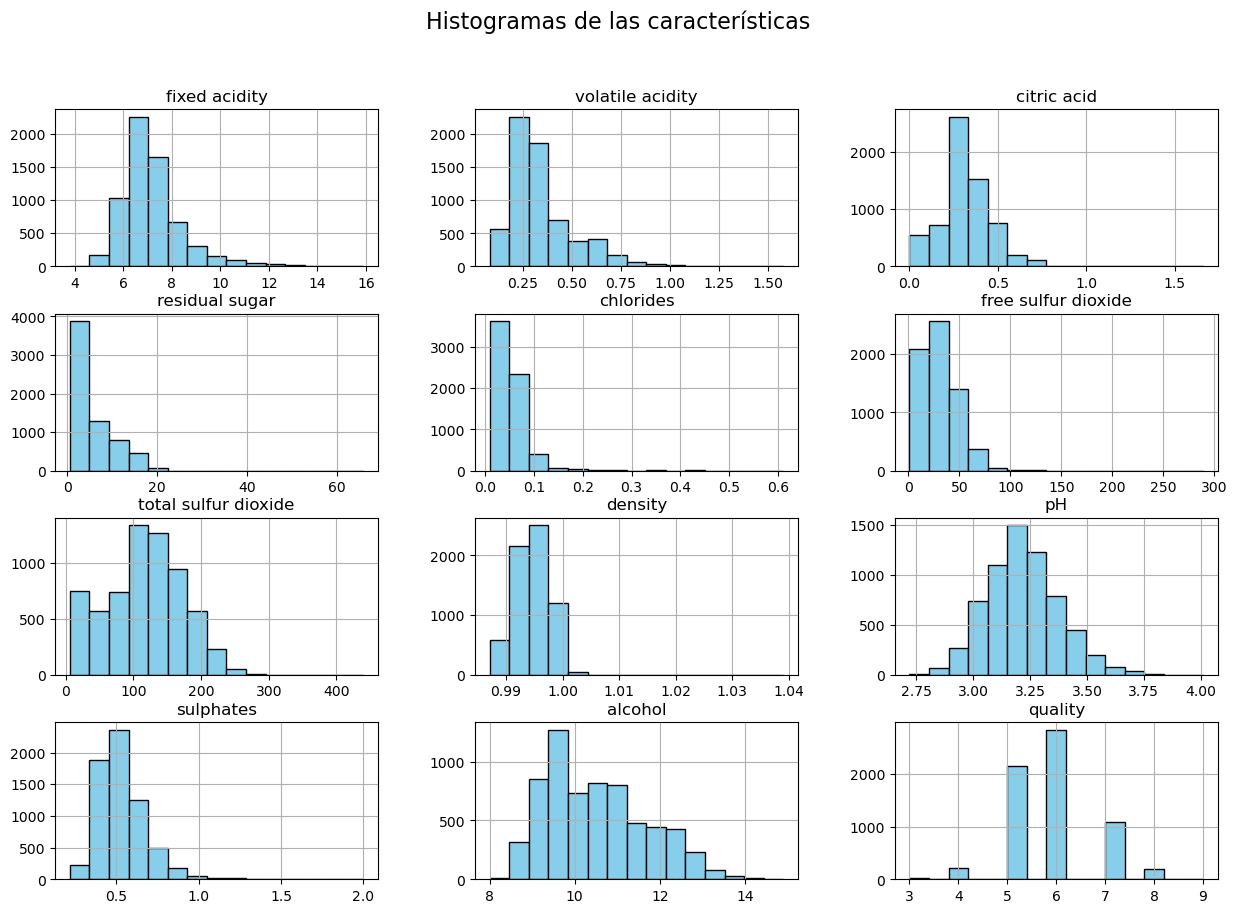

In [14]:
vino.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogramas de las características', fontsize=16)
plt.show()

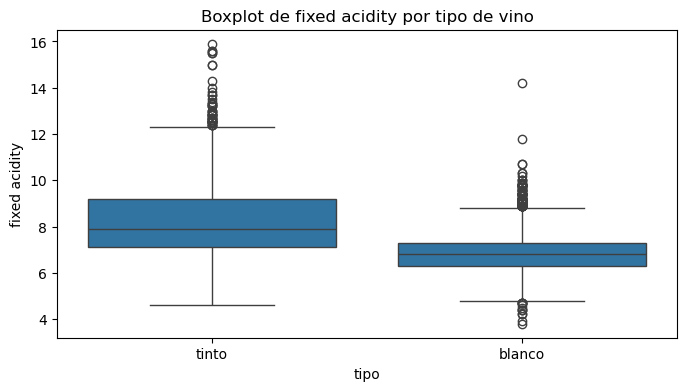

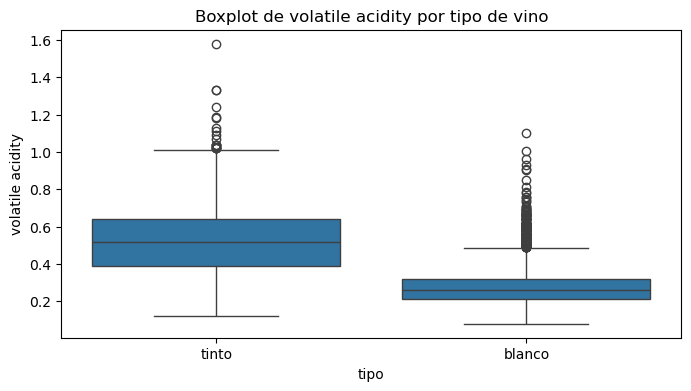

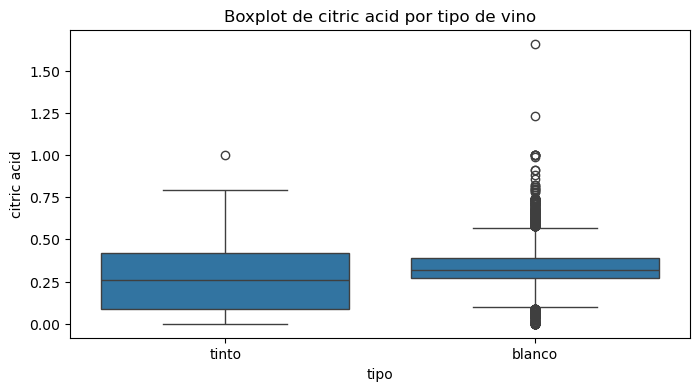

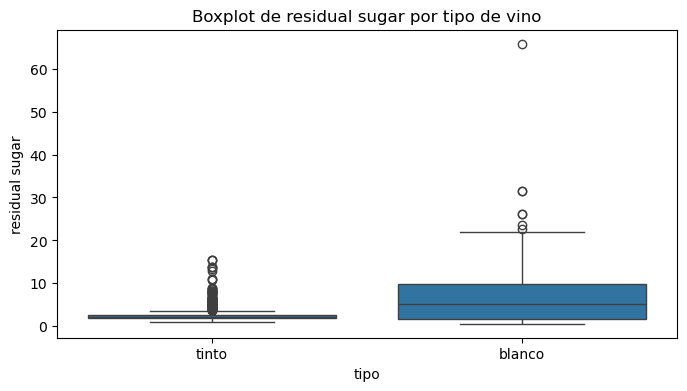

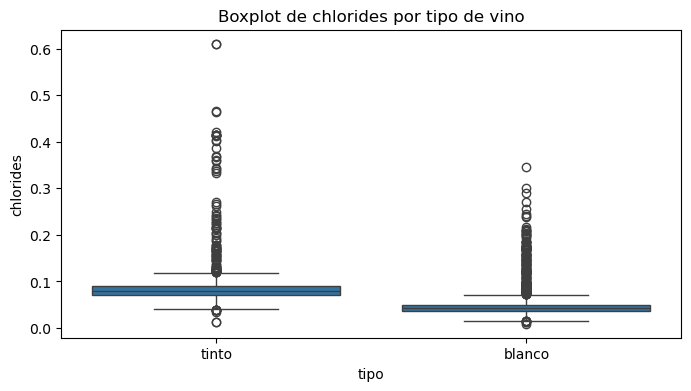

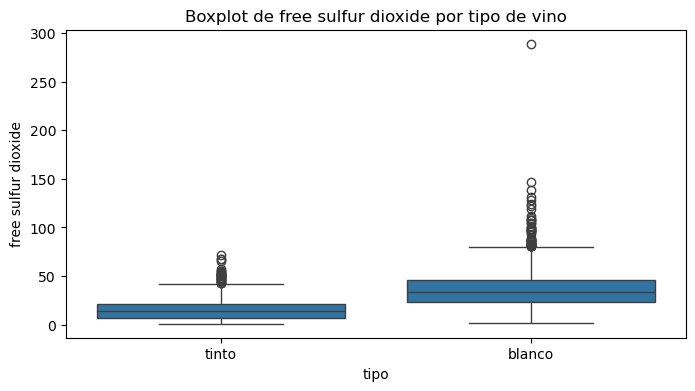

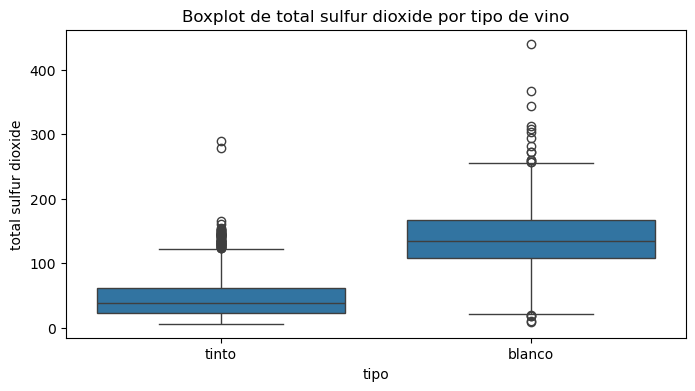

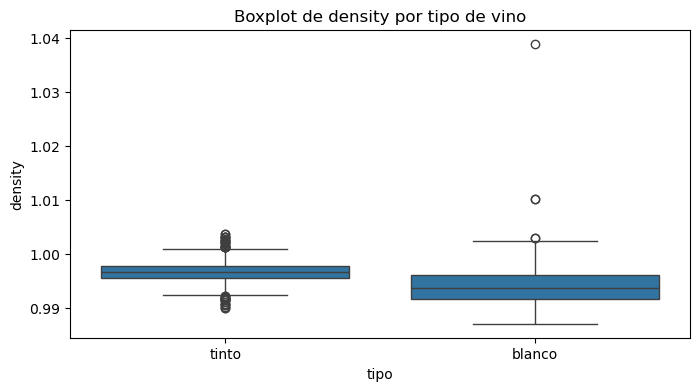

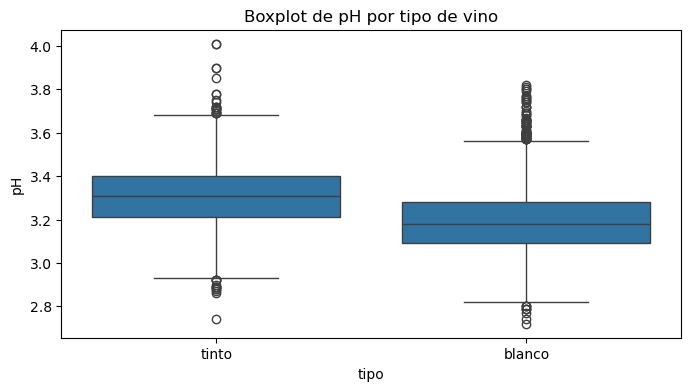

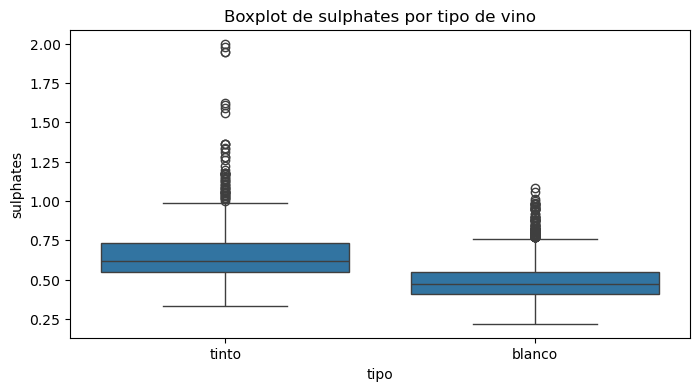

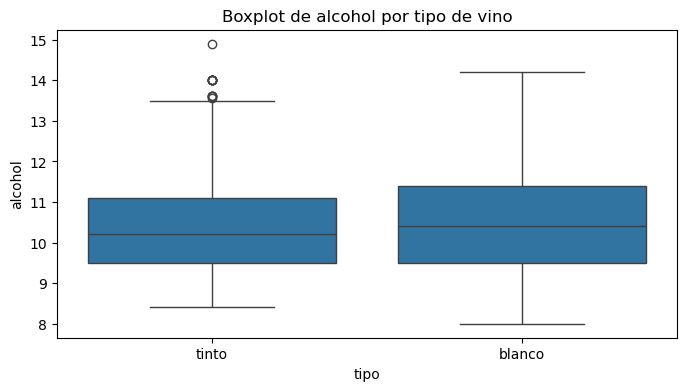

In [15]:
for col in vino.columns[:-2]: 
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='tipo', y=col, data=vino)
    plt.title(f'Boxplot de {col} por tipo de vino')
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split as tts
#creamos los primeros datasets de prueba y entranamiento

# vino
vino_train_set, vino_test_set = tts(vino, test_size=0.2, random_state=42)

In [17]:

vino_Nulos = vino_train_set.isnull().sum()
print("valores nulos en dataset 1:", vino_Nulos, "\n")

valores nulos en dataset 1: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
tipo                    0
dtype: int64 



In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
scaler_standard = StandardScaler()
# Separamos la variable objetivo
quality_vino = vino_train_set["quality"]
v_sin_quality = vino_train_set.drop("quality", axis=1)

#convertimos las variables categoricas a numericas

categorical_cols = v_sin_quality.select_dtypes(include=['object']).columns
numerical_cols = v_sin_quality.select_dtypes(exclude=['object']).columns

# One-hot encode el tipo de vino
v_tipo = pd.get_dummies(v_sin_quality['tipo'], prefix=categorical_cols)
v_numericos = v_sin_quality[numerical_cols]
#combinamos los tipos
v_procesado = pd.concat([v_numericos, v_tipo], axis=1)

#escalamos los datos
scaler_standard = StandardScaler()
v_train_scaled = scaler_standard.fit_transform(v_procesado)
v_train_scaled = pd.DataFrame(v_train_scaled, 
                              columns=v_procesado.columns, 
                              index=v_procesado.index)

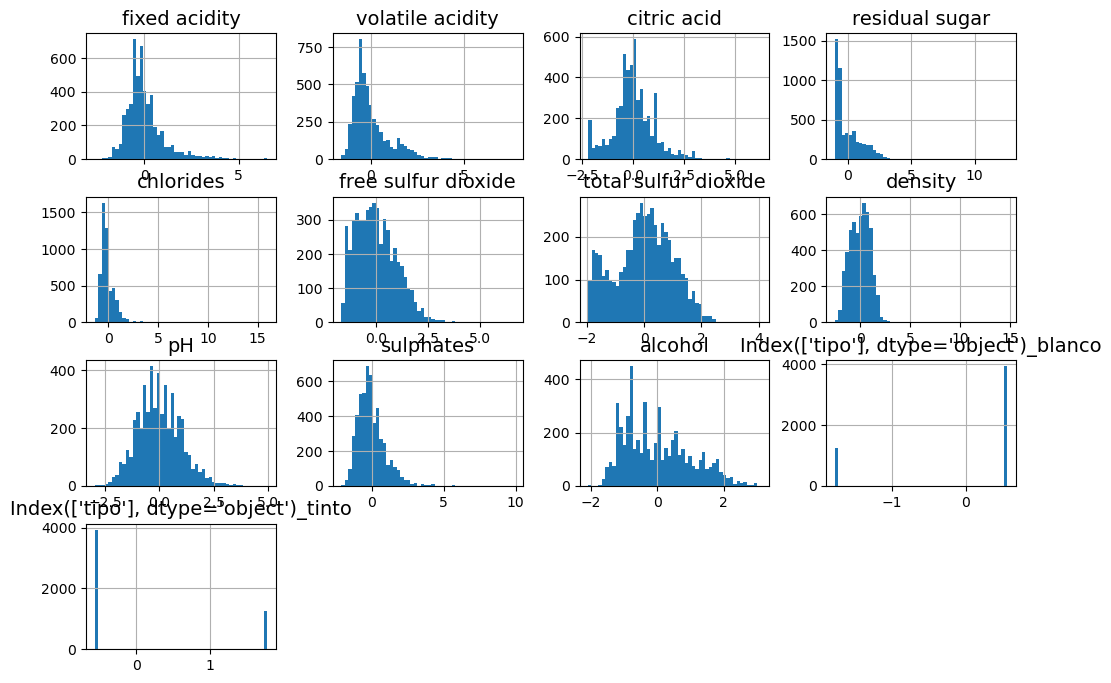

In [19]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
 
v_train_scaled.hist(bins=50, figsize=(12, 8))
 
plt.show()

In [20]:
#3.4
# Ratio: fixed acidity / volatile acidity
def fixed_to_volatile(X):
    return X[:, [0]] / (X[:, [1]] + 1e-5)  # evitar división por cero

def fixed_to_volatile_name(transformer, feature_names_in):
    return ["fixed_to_volatile_ratio"]

fixed_to_volatile_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(fixed_to_volatile, feature_names_out=fixed_to_volatile_name),
    StandardScaler()
)

# Ratio: free sulfur dioxide / total sulfur dioxide
def free_total_SO2(X):
    return X[:, [0]] / (X[:, [1]] + 1e-5)

def free_total_SO2_name(transformer, feature_names_in):
    return ["free_total_SO2_ratio"]

free_total_SO2_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(free_total_SO2, feature_names_out=free_total_SO2_name),
    StandardScaler()
)

# Ratio: sulphates / alcohol
def sulphates_alcohol(X):
    return X[:, [0]] / (X[:, [1]] + 1e-5)

def sulphates_alcohol_name(transformer, feature_names_in):
    return ["sulphates_alcohol_ratio"]

sulphates_alcohol_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(sulphates_alcohol, feature_names_out=sulphates_alcohol_name),
    StandardScaler()
)

In [21]:
# Automatización del preprocesamiento con ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector


# Pipeline para columnas categóricas
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Pipeline por defecto para las columnas numéricas restantes
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# Definir el ColumnTransformer con los pipelines de ratios y otros
preprocessing = ColumnTransformer([
    ("fixed_to_volatile", fixed_to_volatile_pipeline, ["fixed acidity", "volatile acidity"]),
    ("free_total_SO2", free_total_SO2_pipeline, ["free sulfur dioxide", "total sulfur dioxide"]),
    ("sulphates_alcohol", sulphates_alcohol_pipeline, ["sulphates", "alcohol"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
], remainder=default_num_pipeline)

# Ajustar y transformar el conjunto de entrenamiento
X = preprocessing.fit_transform(vino_train_set.drop("quality", axis=1))

# Convertir el resultado a DataFrame con nombres de columnas
vino_train_proc = pd.DataFrame(
    X,
    columns=preprocessing.get_feature_names_out(),
    index=vino_train_set.index
)

# Mostrar las primeras filas
vino_train_proc.head(10)


,fixed_to_volatile__fixed_to_volatile_ratio,free_total_SO2__free_total_SO2_ratio,sulphates_alcohol__sulphates_alcohol_ratio,cat__tipo_blanco,cat__tipo_tinto,remainder__citric acid,remainder__residual sugar,remainder__chlorides,remainder__density,remainder__pH
1916,0.193119,-0.166345,-1.047790,1.0,0.0,0.205467,0.464612,-0.712801,-0.296146,-0.168884
947,0.392351,1.699146,-0.082849,0.0,1.0,1.104063,-0.702999,1.067470,-0.203072,0.269679
877,-1.362270,3.465479,-0.193640,0.0,1.0,-2.144710,-0.702999,0.234762,-0.326062,1.209455
2927,-1.056897,-1.015194,-1.228167,1.0,0.0,0.067221,-0.890650,-0.798944,-1.492810,0.958848
6063,-0.003536,-0.483876,0.092868,1.0,0.0,1.657046,2.070076,-0.081092,1.133204,-0.670098
293,-0.581585,0.200090,0.531989,0.0,1.0,-0.485762,-0.640448,1.211040,0.568112,1.209455
2741,0.691176,0.046053,0.639627,1.0,0.0,0.965818,-0.473647,0.062478,0.435149,-0.482142
445,-1.161832,-0.750924,0.273109,0.0,1.0,-1.522604,-0.702999,0.665473,1.299407,0.081723
1562,-1.400343,2.498644,0.143670,0.0,1.0,-1.315236,-0.723849,0.579331,0.255650,0.457634
4882,0.704414,-0.632718,-0.221928,1.0,0.0,-1.246113,-0.223444,3.680449,-0.242960,-1.797829


## Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest_clf = RandomForestClassifier(random_state=42)
# X es la variable objetivo
pred_forest = cross_val_predict(forest_clf,vino_train_proc, quality_vino, cv=3 )

In [26]:
pred_forest

array([5, 7, 6, ..., 6, 5, 5], dtype=int64)

In [28]:
probas_forest = cross_val_predict(forest_clf,vino_train_proc, quality_vino, cv=3,
                                 method="predict_proba")

In [33]:
#Obtenemos la matriz de las primeras 10 items de la matriz
probas_forest[:10]

array([[0.  , 0.  , 0.63, 0.27, 0.07, 0.03, 0.  ],
       [0.  , 0.  , 0.03, 0.14, 0.82, 0.01, 0.  ],
       [0.  , 0.  , 0.07, 0.82, 0.11, 0.  , 0.  ],
       [0.  , 0.03, 0.16, 0.47, 0.23, 0.11, 0.  ],
       [0.  , 0.02, 0.57, 0.37, 0.04, 0.  , 0.  ],
       [0.  , 0.04, 0.47, 0.45, 0.04, 0.  , 0.  ],
       [0.  , 0.02, 0.78, 0.18, 0.02, 0.  , 0.  ],
       [0.02, 0.08, 0.61, 0.28, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.91, 0.09, 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.14, 0.83, 0.  , 0.01, 0.  ]])

In [34]:
#Obtenemos la probabilidad de las clases positivas
score_forest = probas_forest[:, 1]

In [35]:
score_forest

array([0.  , 0.  , 0.  , ..., 0.02, 0.03, 0.06])